In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
data = pd.read_csv("ai_job_dataset.csv")

In [6]:
data['posting_date'] = pd.to_datetime(data['posting_date'])
data['application_deadline'] = pd.to_datetime(data['application_deadline'])

* Changing **str** data type to **datetime** for *Date-Time* Columns.

In [38]:
data.sample(5)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
3910,AI03911,AI Research Scientist,134588,USD,EX,FT,Austria,L,India,50,"TensorFlow, Hadoop, MLOps, Statistics, Azure",Associate,15,Manufacturing,2024-08-10,2024-08-28,910,9.7,Advanced Robotics
445,AI00446,Data Scientist,181246,USD,SE,CT,Denmark,M,France,0,"TensorFlow, Python, Tableau, Hadoop",PhD,9,Manufacturing,2024-08-06,2024-08-23,981,8.1,Smart Analytics
8690,AI08691,Autonomous Systems Engineer,32790,USD,EN,FT,Austria,S,Austria,50,"Python, Statistics, Computer Vision",PhD,1,Real Estate,2024-09-10,2024-10-25,515,7.2,Machine Intelligence Group
1632,AI01633,Deep Learning Engineer,135560,EUR,SE,PT,Germany,S,Germany,50,"Linux, Scala, TensorFlow, Spark",Master,8,Media,2024-11-27,2025-01-02,850,8.3,Neural Networks Co
7496,AI07497,Robotics Engineer,110442,EUR,MI,FL,Netherlands,L,Netherlands,50,"Kubernetes, Computer Vision, Python",Associate,3,Automotive,2024-11-11,2025-01-09,697,8.6,DeepTech Ventures


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   job_id                  15000 non-null  object        
 1   job_title               15000 non-null  object        
 2   salary_usd              15000 non-null  int64         
 3   salary_currency         15000 non-null  object        
 4   experience_level        15000 non-null  object        
 5   employment_type         15000 non-null  object        
 6   company_location        15000 non-null  object        
 7   company_size            15000 non-null  object        
 8   employee_residence      15000 non-null  object        
 9   remote_ratio            15000 non-null  int64         
 10  required_skills         15000 non-null  object        
 11  education_required      15000 non-null  object        
 12  years_experience        15000 non-null  int64 

In [9]:
data.isnull().sum()

,0
job_id,0
job_title,0
salary_usd,0
salary_currency,0
experience_level,0
employment_type,0
company_location,0
company_size,0
employee_residence,0
remote_ratio,0


* No columns has Null values.


In [10]:
data.describe()

,salary_usd,remote_ratio,years_experience,posting_date,application_deadline,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000,15000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,2024-08-29 08:48:51.840000,2024-10-11 21:55:23.520000,1503.314733,7.504273
min,32519.000000,0.000000,0.000000,2024-01-01 00:00:00,2024-01-16 00:00:00,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,2024-04-29 00:00:00,2024-06-13 00:00:00,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,2024-08-28 00:00:00,2024-10-12 00:00:00,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2024-12-29 00:00:00,2025-02-10 00:00:00,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2025-04-30 00:00:00,2025-07-11 00:00:00,2499.000000,10.000000
std,60260.940438,40.812712,5.545768,NaN,NaN,576.127083,1.450870


* There are 5 Numerical Coulmns in the Dataset

In [11]:
data.shape

(15000, 19)

* Dataset has *15000*  **Rows** and *19*  **Columns**.

In [12]:
from ydata_profiling import ProfileReport
pf = ProfileReport(data)
pf.to_file(output_file="Job_analysis_2025.html")

* Observing Overview of data.

## Data Observations

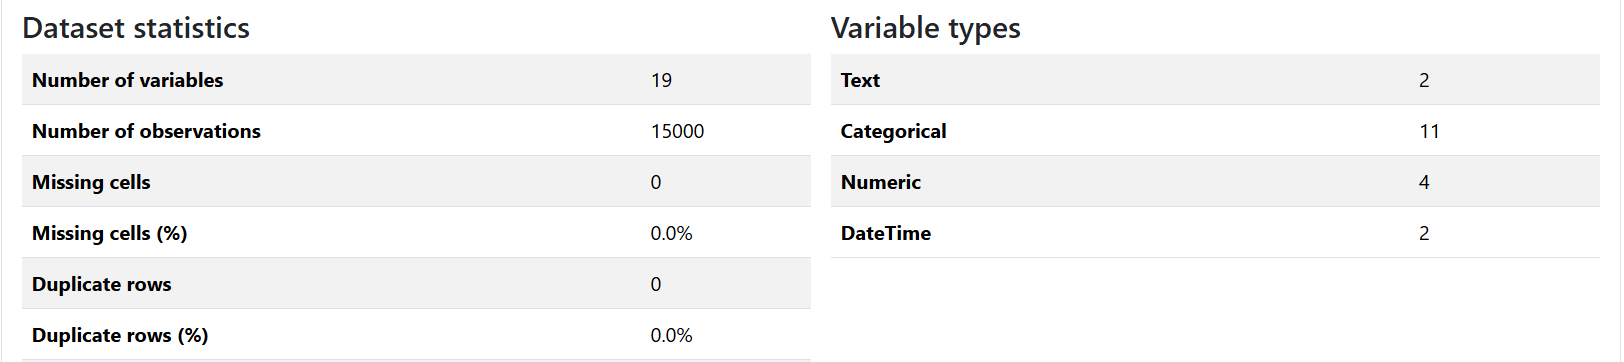

In [40]:
from IPython.display import Image
Image('Dataset_Overview.png')

## 1] Job Title

In [41]:

top_5_jobs = data['job_title'].value_counts().nlargest(5).index


In [30]:

filtered_data = data[data['job_title'].isin(top_5_jobs)]


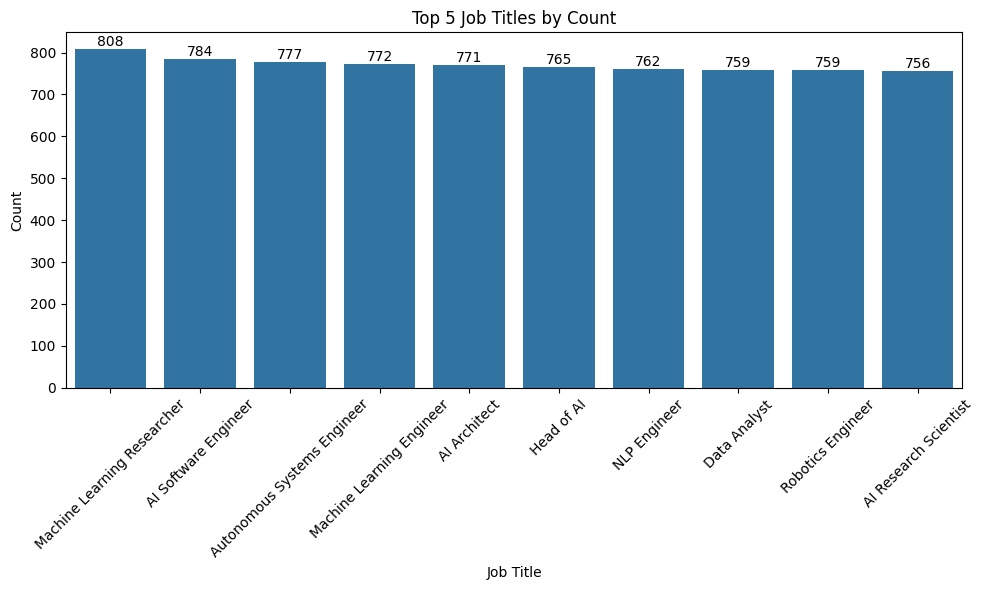

In [15]:
from typing import Any

top_5_jobs = data['job_title'].value_counts().nlargest(10).index

filtered_data = data[data['job_title'].isin(top_5_jobs)]

plt.figure(figsize=(10, 6))
ax = sns.countplot(x="job_title", data=filtered_data , order=filtered_data['job_title'].value_counts().index)
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.title("Top 5 Job Titles by Count")
plt.xticks(rotation=45)


for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(count),
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Insights
* High demand for AI/ML roles—top 5 are all AI-related.

* Shift toward specialized roles (e.g., AI Architect, Autonomous Systems Engineer).

* Research-focused roles like ML Researcher are leading—R&D is a priority.  

* Engineering roles dominate over analyst roles—industry is moving beyond basic analytics.  

* Suggest internal upskilling programs to meet AI talent needs.

## 2] Salary vs Education vs Experience

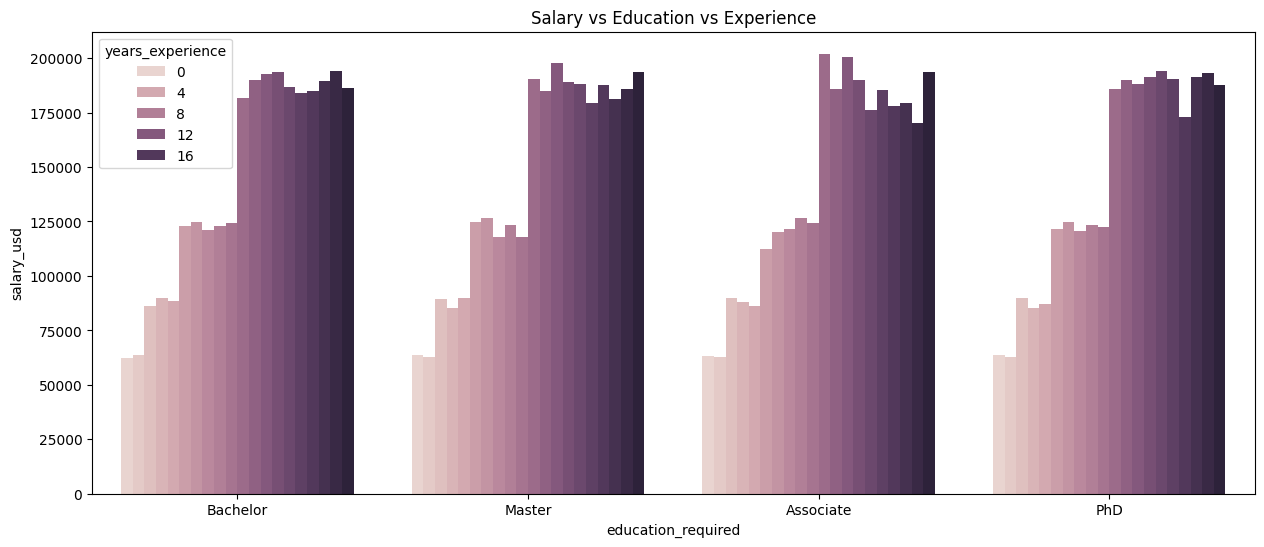

In [16]:
plt.figure(figsize=(15, 6))

sns.barplot(x='education_required', y='salary_usd', hue='years_experience' , data=data ,errorbar=None )
plt.title("Salary vs Education vs Experience")
plt.show()

### Insights from Salary vs Education vs Experience
* Salary increases with experience across all education levels
More years of experience lead to higher salaries, regardless of degree type.

* **PhD* holders consistently earn the highest salaries
At nearly every experience level, **PhD** graduates top the salary chart.

* **Bachelor’s** and **Associate degrees** offer similar salary growth up to mid-level experience
These two education levels show comparable salary trends until around 8–12 years of experience.

* **Master’s** degree offers balanced growth higher than **Bachelor’s**, lower than **PhD**
Provides a strong salary trajectory without requiring a PhD.

* Education has a strong impact early in a career; experience dominates later initial salary differences are shaped by degree, but over time, experience becomes the bigger driver.

##3] Remote Ratio vs Company Location

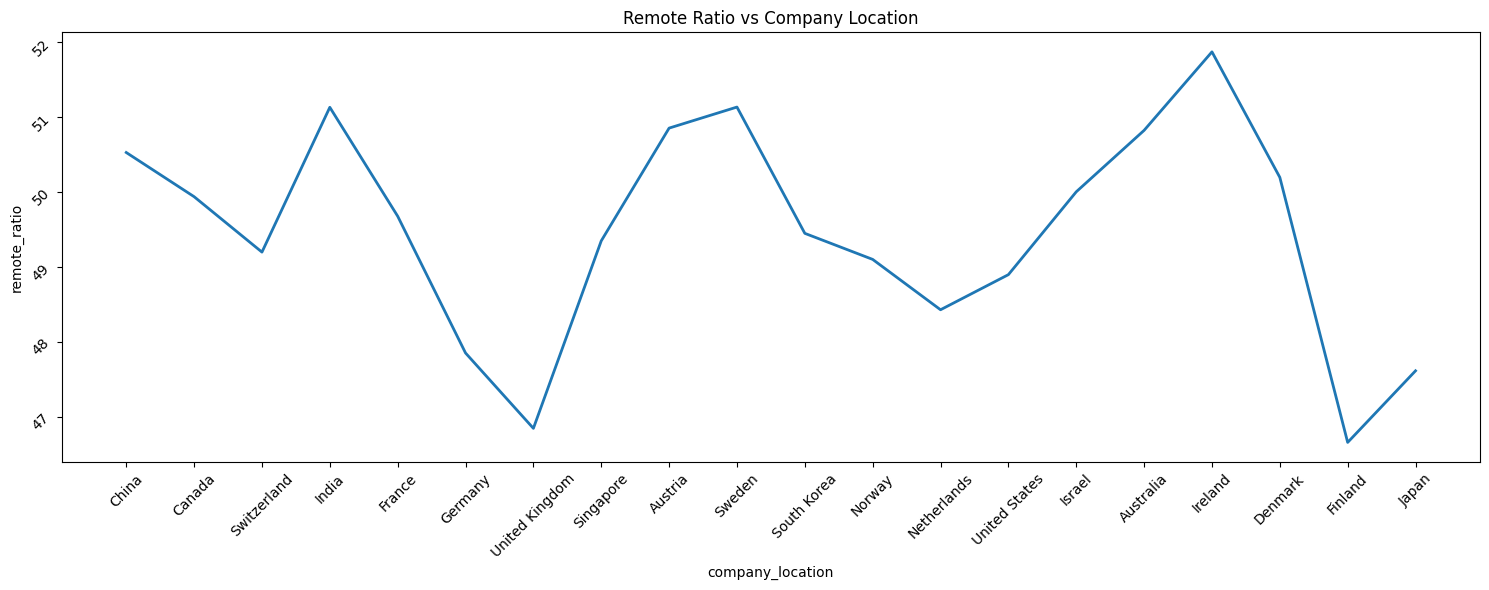

In [17]:
plt.figure(figsize=(15, 6))

sns.lineplot(x='company_location' , y= 'remote_ratio' , errorbar= None , data=data , linewidth=2)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Remote Ratio vs Company Location")
plt.tight_layout()
plt.show()


### Insights

* **Ireland** has the highest remote work ratio.

* **Finland** has the lowest.

* **India**, **Sweden**, and **Austria** show strong remote work culture.

* **Germany**, **UK**, and **Japan** lean more toward in-office work.

* Overall, most countries maintain a balanced remote work trend.

## 4] Number of companies vs Salary Currency

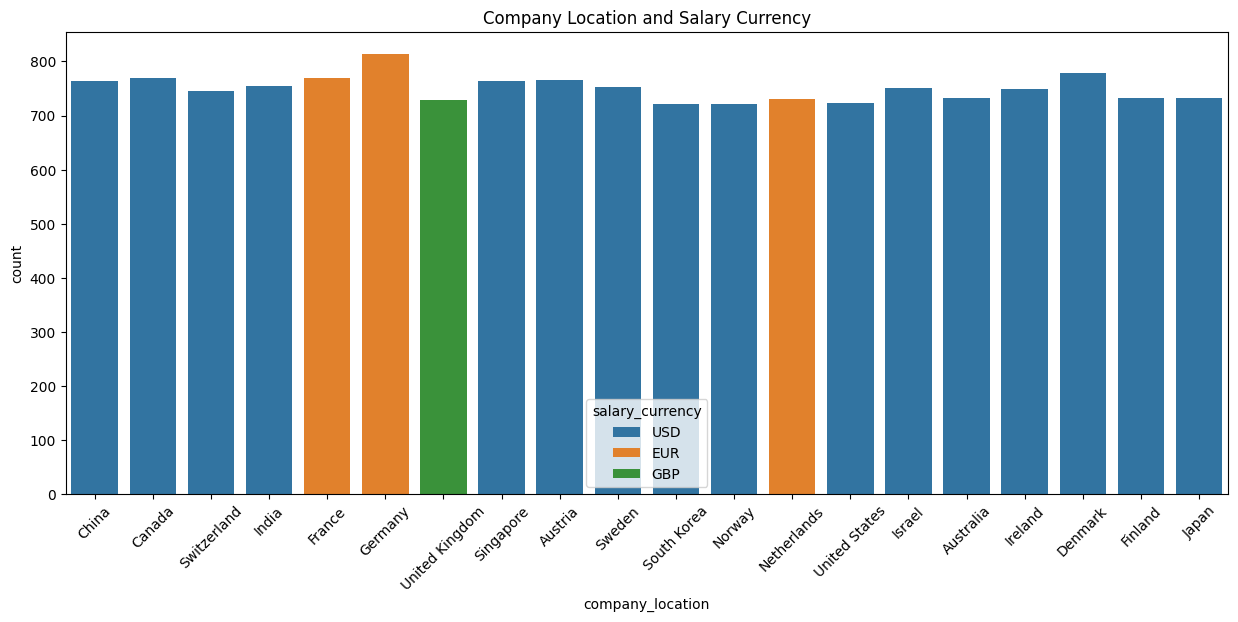

In [27]:
plt.figure(figsize=(15, 6))
sns.countplot(x='company_location' , hue='salary_currency' ,data=data)
plt.title("Company Location and Salary Currency")
plt.xticks(rotation=45)
plt.show()

## Insights from Salary Currency Distribution by Country
* *USD* is the dominant salary currency globally.  
* *EUR* is used in select European countries Countries like **Germany**, **France**, and the **Netherlands** report salaries in EUR, as expected for Eurozone nations.  
* *GBP* is used exclusively in the *UK* .The **United Kingdom** is the only country using *GBP*, reflecting its distinct currency system.  
* The heavy use of *USD* across diverse locations may indicate a trend toward standardized reporting, aiding easier salary comparisons.  
* Despite each country’s standard currency, the frequent use of *USD* reflects international hiring and salary normalization in global tech roles.

## 5] Employment Type vs Employment Experience Level

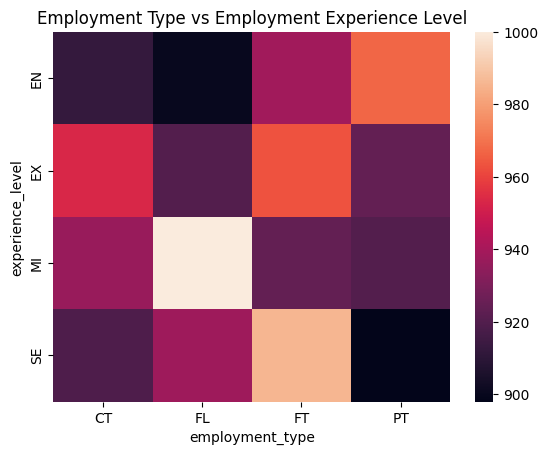

In [37]:
sns.heatmap(pd.pivot_table(data, index='experience_level', columns ='employment_type' , values='job_id', aggfunc='count'))
plt.title("Employment Type vs Employment Experience Level")
plt.show()

## Insights

* **Mid-Level Freelance (MI–FL)** is the most common combination, indicating companies rely heavily on freelancers with moderate experience.

* **Senior Full-Time (SE–FT)** roles are also very prominent, showing demand for experienced professionals in stable, long-term roles.

* **Entry-Level Part-Time (EN–PT)** jobs are relatively more common, offering flexible options for newcomers in AI.

* **Expert Part-Time (EX–PT)** and **Senior Part-Time (SE–PT)** roles are the least common, suggesting part-time work is rare for high-level positions.

* **Freelance** roles span all experience levels, but skew toward Mid and Senior, likely for project-based expertise.

##6] Company size by Count

In [21]:

pd.pivot_table(data, index='company_size', values='company_name', aggfunc='count')


,company_name
company_size,
L,4998
M,4995
S,5007


### Insight

* AI job opportunities are evenly distributed across company sizes, with small, medium, and large firms each contributing roughly one-third of the listings.

##7] Company Name vs Benefit Score and Salary

In [29]:
pivot = pd.pivot_table(
    data,
    index=['company_name'],
    values=['salary_usd' , 'benefits_score'],
    aggfunc='sum'
).sort_values(by='benefits_score', ascending=False)
pivot

,benefits_score,salary_usd
company_name,,
TechCorp Inc,7380.4,118842993
Cognitive Computing,7334.1,109520181
AI Innovations,7229.2,107497348
Digital Transformation LLC,7192.4,108415738
Future Systems,7167.1,111620309
Quantum Computing Inc,7159.1,110709592
Cloud AI Solutions,7142.1,111024051
Predictive Systems,7068.3,108475699
Smart Analytics,7018.3,105738454


### Insights (Salary)

* **TechCorp Inc** leads with the highest total salary payout, followed by **Future Systems** and **Quantum Computing Inc**.

* Salaries are relatively competitive across top companies, all exceeding $100 million+ in cumulative payouts.

* This indicates high hiring volumes or premium compensation in these firms for AI talent.  

<hr/>

### Insights (Benefit Score)

*   **TechCorp Inc** also ranks highest in benefits score (7380+), suggesting a strong overall employee value proposition.

* **Cognitive Computing** and **AI Innovations** also offer very attractive benefits, even if they don’t lead in salary.

* Companies like **Algorithmic Solutions** and **DataVision** Ltd have lower benefits scores among the top salary payers, suggesting a possible trade-off between pay and perks.






##8] Number of Positing Job in industries

In [23]:

pd.pivot_table(data, index='industry', values='posting_date', aggfunc='count').sort_values(by='posting_date', ascending=False)

,posting_date
industry,
Retail,1063
Media,1045
Automotive,1020
Consulting,1020
Technology,1011
Real Estate,1007
Government,998
Telecommunications,997
Healthcare,997


### Insights
* **Retail**, **Media**, and **Automotive** industries posted the most AI job openings, while **Education** and **Manufacturing** had the least indicating stronger AI hiring trends in consumer-facing sectors.*